# CIFAR10 with Keras and CNN
Testing Keras' CNNs on CIFAR10 with a pretty typical layer disposition.

## Data Setup

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(numpy.shape(x))

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

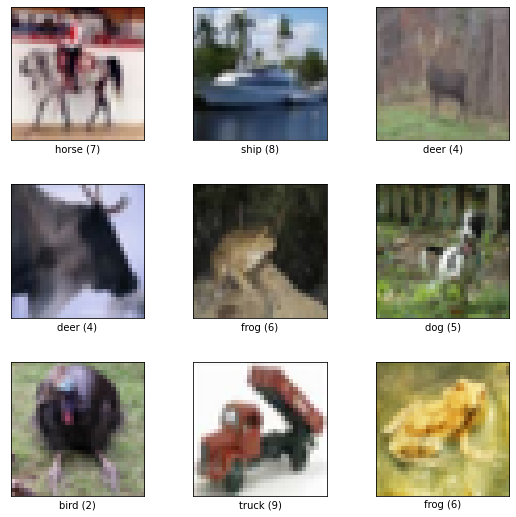

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
ds, info = tfds.load('cifar10', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

In [9]:
ds

<PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

## Model Definition

In [10]:
from keras.models import Sequential
model = Sequential()

In [11]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [12]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

In [13]:
model.add(MaxPool2D())

In [14]:
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [15]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
____________________________________________________

## Fitting

In [18]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1)

Epoch 1/15
1000/1000 [==============================] - 28s 28ms/step - loss: 1.5139 - accuracy: 0.4548
Epoch 2/15
1000/1000 [==============================] - 27s 27ms/step - loss: 1.1974 - accuracy: 0.5800
Epoch 3/15
1000/1000 [==============================] - 27s 27ms/step - loss: 1.0697 - accuracy: 0.6278
Epoch 4/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.9857 - accuracy: 0.6592
Epoch 5/15
1000/1000 [==============================] - 27s 27ms/step - loss: 0.9263 - accuracy: 0.6793
Epoch 6/15
1000/1000 [==============================] - 27s 27ms/step - loss: 0.8849 - accuracy: 0.6964
Epoch 7/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.8351 - accuracy: 0.7134
Epoch 8/15
1000/1000 [==============================] - 29s 29ms/step - loss: 0.7999 - accuracy: 0.7245
Epoch 9/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.7698 - accuracy: 0.7344
Epoch 10/15
1000/1000 [==============================] - 28s 28m

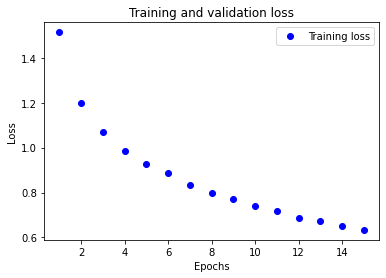

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
labels=model.predict(x_test)

In [21]:
labels[1]

array([1.6784411e-02, 1.6825173e-02, 1.4369089e-05, 2.9331224e-07,
       9.4147242e-07, 4.0201314e-08, 1.5728878e-10, 5.1336463e-07,
       9.6587390e-01, 5.0034665e-04], dtype=float32)

In [22]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
import numpy as np
labels1 = np.argmax(labels, axis=-1)    
labels1

array([3, 8, 8, ..., 7, 4, 7], dtype=int64)

In [24]:
y_test1 = np.argmax(y_test, axis=-1)    
y_test1

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, labels1))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1000
           1       0.86      0.78      0.82      1000
           2       0.61      0.59      0.60      1000
           3       0.55      0.54      0.54      1000
           4       0.60      0.74      0.66      1000
           5       0.65      0.61      0.63      1000
           6       0.78      0.76      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.85      0.75      0.80      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8913 - accuracy: 0.7094


[0.8912973403930664, 0.7093999981880188]